In [1]:
import re
import os
import pytz
from datetime import datetime

import ipaddress
import pandas as pd
import matplotlib.pyplot as plt
from cyberpandas import IPArray, to_ipaddress

In [2]:
%config InlineBackend.figure_format = 'retina'

# parse logfiles

In [3]:
def parse_str(x):
    """
    Returns the string delimited by two characters.

    Example:
        `>>> parse_str('[my string]')`
        `'my string'`
    """
    return x[1:-1] if x is not None else x

In [4]:
def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))

In [5]:
df = pd.read_csv(
    'python_podcast.access.log',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['remote', 'user', 'user1', 'timestamp', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'timestamp': parse_datetime,
                'request': parse_str,
                'status': int,
                'size': int,
                'referer': parse_str,
                'user_agent': parse_str
    })

In [16]:
df = df.drop([121601])

In [17]:
#df[df.remote.str.find("139.162.225.200") > 0]

In [18]:
#df.iloc[121601]["remote"] = "139.162.225.200"

In [19]:
df["remote"] = IPArray(df.remote)
df[["method", "uri", "protocol"]] = df.request.str.split(" ", expand=True)
df = df.drop("request", axis=1)

In [20]:
df.tail(100)

,remote,timestamp,status,size,referer,user_agent,method,uri,protocol
142819,87.79.216.83,2019-05-18 08:35:44+02:00,302,23,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/,HTTP/2.0
142820,87.79.216.83,2019-05-18 08:35:44+02:00,200,7475,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/show/,HTTP/2.0
142821,87.79.216.83,2019-05-18 08:35:44+02:00,200,527,https://python-podcast.de/show/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/api/audios/podlove/14,HTTP/2.0
142822,87.79.216.83,2019-05-18 08:35:44+02:00,200,304,https://python-podcast.de/show/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/api/audios/podlove/12,HTTP/2.0
142823,87.79.216.83,2019-05-18 08:35:44+02:00,200,303,https://python-podcast.de/show/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/api/audios/podlove/9,HTTP/2.0
142824,87.79.216.83,2019-05-18 08:35:44+02:00,200,371,https://python-podcast.de/show/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/api/audios/podlove/13,HTTP/2.0
142825,87.79.216.83,2019-05-18 08:35:44+02:00,200,307,https://python-podcast.de/show/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/api/audios/podlove/8,HTTP/2.0
142826,87.79.216.83,2019-05-18 08:35:56+02:00,302,23,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/hidden_admin/,HTTP/2.0
142827,87.79.216.83,2019-05-18 08:35:56+02:00,200,818,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/hidden_admin/login/?next=/hidden_admin/,HTTP/2.0
142828,87.79.216.83,2019-05-18 08:35:56+02:00,200,498,https://python-podcast.de/hidden_admin/login/?...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,GET,/static/admin/css/login.252ffabd6548.css,HTTP/2.0


In [21]:
df.remote.unique()

IPArray(['79.230.47.221', '185.206.225.30', '109.201.154.195', '89.204.153.205', '84.119.132.134', '89.204.154.46', '66.249.66.30', '66.249.66.31', '66.249.66.29', '2.247.240.172', '17.154.84.39', '17.154.129.200', '17.154.84.40', '17.154.166.40', '17.124.176.220', '17.124.176.219', '46.166.186.227', '46.166.186.228', '66.249.66.134', '66.249.66.136', '66.249.66.132', '97.107.141.176', '45.33.75.134', '199.16.157.182', '199.16.157.180', '87.79.218.54', '199.16.157.183', '17.58.101.146', '176.9.136.185', '94.130.167.109', '94.130.167.116', '34.201.163.243', '54.36.150.107', '54.36.149.196', '178.63.98.214', '35.233.210.185', '37.187.165.31', '52.91.61.38', '18.206.159.236', '195.201.245.31', '52.87.61.117', '54.89.250.102', '52.90.120.78', '89.182.187.82', '149.154.167.162', '84.62.251.68', '46.93.28.48', '92.116.21.185', '34.209.149.3', '88.99.195.197', '94.130.167.100', '92.116.169.202', '18.237.16.250', '66.249.65.107', '66.249.65.105', '66.249.65.109', '89.204.155.222', '109.41.194.

In [22]:
df.shape

(142918, 9)

# Referers

In [23]:
referers = df['referer'].dropna()

In [24]:
domains = referers.str.extract(r'^(https?://)?(www.)?([^/]*)')[2].str.lower()

In [25]:
domains.value_counts().divide(domains.count())

python-podcast.de          0.795868
python-podcast.com         0.083697
pythonpodcast.de           0.029816
google.com.hk              0.020765
google.com                 0.017517
brandnewblogs.com          0.009104
t.co                       0.005697
duckduckgo.com             0.004845
google.de                  0.003780
uptime.com                 0.003780
pizza-imperia.com          0.003354
burger-imperia.com         0.003301
hundejo.com                0.002556
pizza-tycoon.com           0.002076
burger-tycoon.com          0.001225
itunes.apple.com           0.001225
yandex.com                 0.000799
facebook.com               0.000639
yandex.ru                  0.000639
ecosia.org                 0.000639
android-app:               0.000639
konektom.org               0.000426
google.at                  0.000319
bing.com                   0.000319
frierock-festival.de       0.000266
ogroup.com                 0.000266
pythonplot.com             0.000266
carbootle.co.uk            0

In [13]:
#referers[referers.str.contains('google')]

In [26]:
google_searches = referers[referers.str.contains(
    r'^(https?://)?(www.)?(google.[^/]*)/search?')]
#google_queries = google_searches.str.extract(r'[?&]q=([^&]*)&?')
#google_queries = google_queries.str.replace('+', ' ')
#google_queries[:5]

/Users/jochen/.virtualenvs/pp/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [27]:
type(google_searches)

pandas.core.series.Series

In [28]:
for gs in google_searches:
    print(gs)

https://www.google.com/search?lr=lang_de&client=firefox-b-m&nfpr=1&tbs=lr:lang_1de&q=Podcast+python&spell=1&sa=X&ved=2ahUKEwiN7euA853hAhXGDewKHUoJBp0QBXoECAEQAQ
https://www.google.com/search?lr=lang_de&client=firefox-b-m&nfpr=1&tbs=lr:lang_1de&q=Podcast+python&spell=1&sa=X&ved=2ahUKEwiN7euA853hAhXGDewKHUoJBp0QBXoECAEQAQ
https://www.google.com/search?lr=lang_de&client=firefox-b-m&nfpr=1&tbs=lr:lang_1de&q=Podcast+python&spell=1&sa=X&ved=2ahUKEwiN7euA853hAhXGDewKHUoJBp0QBXoECAEQAQ
https://www.google.com/search?q=python+podcast&ie=utf-8&oe=utf-8&client=firefox-b-m
https://www.google.com/search?q=python+podcast&ie=utf-8&oe=utf-8&client=firefox-b-m
https://www.google.com/search?q=python+podcast&ie=utf-8&oe=utf-8&client=firefox-b-m
https://www.google.com/search?q=python+podcast&ie=utf-8&oe=utf-8&client=firefox-b-m
https://www.google.com/search?q=python+podcast&ie=utf-8&oe=utf-8&client=firefox-b-m
https://www.google.com/search?q=python+programmierung+podcast&ie=utf-8&oe=utf-8&client=firefox-b-

# Visits by week day

In [29]:
df['weekday'] = df['timestamp'].apply(lambda x: x.isoweekday())
weekdays = df.groupby('weekday')['remote'].agg(len)
weekdays = weekdays.divide(weekdays.sum())
weekdays

weekday
1    0.145601
2    0.151108
3    0.149953
4    0.149799
5    0.138632
6    0.135455
7    0.129452
Name: remote, dtype: float64

In [30]:
#weekdays.index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
#weekdays.plot(kind='barh')
#plt.title('Visits over the week')
#plt.xlabel('visits (normed)')
#plt.show()

# Total daily visits

In [31]:
df

,remote,timestamp,status,size,referer,user_agent,method,uri,protocol,weekday
0,79.230.47.221,2018-12-01 06:55:44+01:00,200,2678,None,None,GET,/show/,HTTP/2.0,6
1,79.230.47.221,2018-12-01 06:55:44+01:00,200,12593,None,None,GET,/static/images/favicons/favicon.6479efe54d11.ico,HTTP/2.0,6
2,79.230.47.221,2018-12-01 06:55:44+01:00,200,323,None,None,GET,/api/audios/podlove/5?format=json,HTTP/2.0,6
3,79.230.47.221,2018-12-01 06:56:55+01:00,200,1431,None,None,GET,/,HTTP/2.0,6
4,79.230.47.221,2018-12-01 06:57:06+01:00,200,1431,None,None,GET,/,HTTP/2.0,6
5,79.230.47.221,2018-12-01 06:57:06+01:00,200,12593,None,None,GET,/static/images/favicons/favicon.6479efe54d11.ico,HTTP/2.0,6
6,79.230.47.221,2018-12-01 07:00:49+01:00,200,1431,https://python-podcast.de/show/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1...,GET,/,HTTP/2.0,6
7,79.230.47.221,2018-12-01 07:00:50+01:00,200,12593,https://python-podcast.de/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1...,GET,/static/images/favicons/favicon.6479efe54d11.ico,HTTP/2.0,6
8,185.206.225.30,2018-12-01 07:02:29+01:00,200,3539,https://python-podcast.com/,Mozilla/5.0 (Windows NT 7.0; WOW64; rv:33.1) G...,GET,/,HTTP/1.0,6
9,185.206.225.30,2018-12-01 07:02:29+01:00,200,3539,https://python-podcast.com/,Mozilla/5.0 (Windows NT 7.0; WOW64; rv:33.1) G...,GET,/,HTTP/1.0,6


In [32]:
visits = df[["uri", "timestamp"]].copy()

In [33]:
visits.index = pd.DatetimeIndex(visits.timestamp, tz="utc")

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True

In [34]:
visits.index = pd.to_datetime(visits.timestamp, utc=True)

In [35]:
visits = visits.set_index("timestamp", kind="period")

TypeError: set_index() got an unexpected keyword argument 'kind'

In [36]:
visits.resample('D').count()

,uri,timestamp
timestamp,,
2018-12-01 00:00:00+00:00,173,173
2018-12-02 00:00:00+00:00,562,562
2018-12-03 00:00:00+00:00,262,262
2018-12-04 00:00:00+00:00,142,142
2018-12-05 00:00:00+00:00,139,139
2018-12-06 00:00:00+00:00,116,116
2018-12-07 00:00:00+00:00,238,238
2018-12-08 00:00:00+00:00,206,206
2018-12-09 00:00:00+00:00,307,307


In [37]:
visits = visits.resample('D').count()

/Users/jochen/.virtualenvs/pp/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


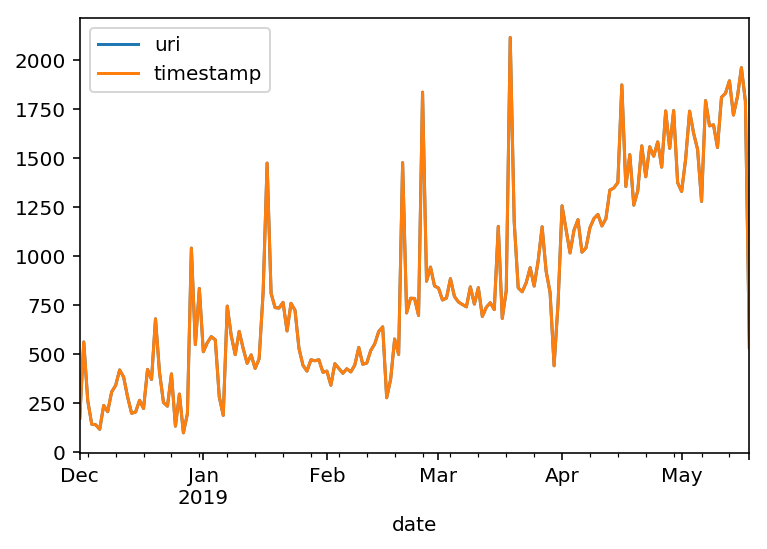

In [38]:
visits.index.name = 'date'
visits.plot()

/Users/jochen/.virtualenvs/pp/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


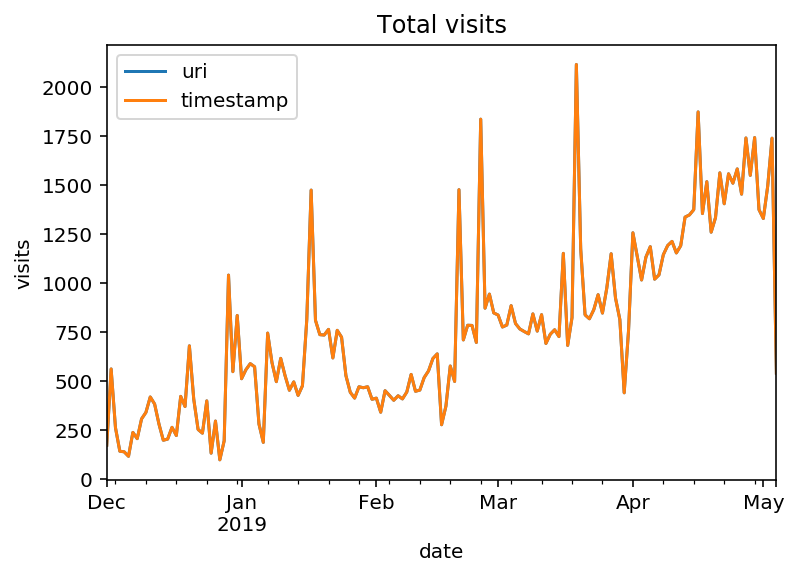

In [26]:
visits = df[["uri", "timestamp"]].copy()
#visits.index = df['timestamp']
visits.index = pd.to_datetime(df.timestamp, utc=True)
#visits = visits.resample('D', kind='period').count()
visits = visits.resample('D').count()
visits.index.name = 'date'
visits.plot()
plt.title('Total visits')
plt.ylabel('visits')
plt.show()

In [27]:
import pytz
from datetime import date
from datetime import datetime
from datetime import timedelta

today = pytz.utc.localize(datetime(2019, 1, 20))

In [28]:
def last_day(d, day_name):
    days_of_week = ['sunday','monday','tuesday','wednesday',
                        'thursday','friday','saturday']
    target_day = days_of_week.index(day_name.lower())
    delta_day = target_day - d.isoweekday()
    if delta_day >= 0: delta_day -= 7 # go back 7 days
    return d + timedelta(days=delta_day)

In [29]:
last_sunday = last_day(pytz.utc.localize(datetime.today()), 'sunday')

In [32]:
dg = df[df.timestamp < last_sunday]

In [33]:
dg = df

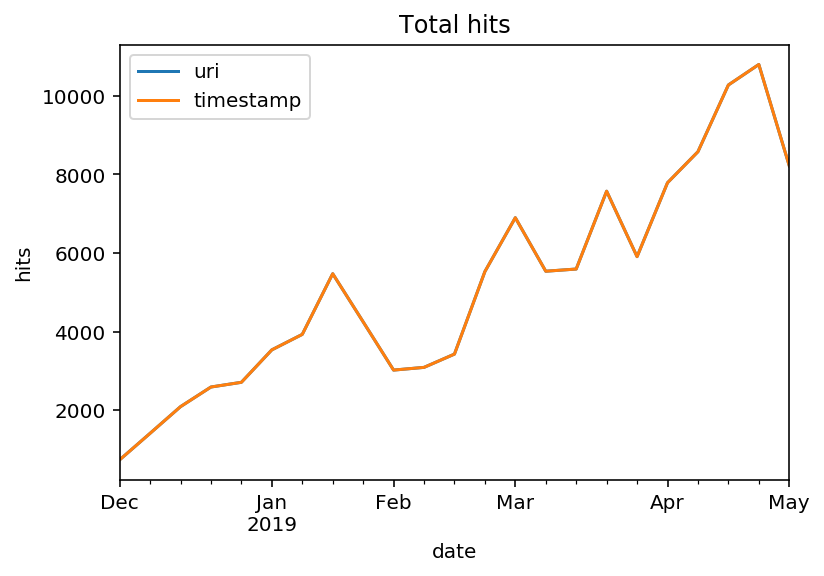

In [34]:
visits = dg[["uri", "timestamp"]].copy()
#visits.index = dg['timestamp']
visits.index = pd.to_datetime(visits.timestamp, utc=True)
visits = visits.resample('W').count()
visits.index.name = 'date'
visits.plot()
plt.title('Total hits')
plt.ylabel('hits')
plt.show()

# gecode ips

In [10]:
import time
import requests

In [11]:
ips = list(df.remote.unique())

In [30]:
IAK = os.environ.get("IPSTACK_API_KEY")

In [ ]:
successful_lookups = []
failed_lookups = []
for ip in ips:
    print(".", end="")
    try:
        successful_lookups.append(
            requests.get(f"http://api.ipstack.com/{ip}?access_key={IAK}").json())
    except:
        failed_lookups.append(ip)
        continue
    # break
        
print("\n")
print("Geocoded %i ips, %i failed to geocode" % (len(successful_lookups), len(failed_lookups)))

.................................

In [ ]:
successful_lookups[0]

In [34]:
ip_data = pd.DataFrame.from_records(successful_lookups)

In [37]:
ip_data

,city,continent_code,continent_name,country_code,country_name,ip,latitude,location,longitude,region_code,region_name,type,zip
0,Sankt Augustin,EU,Europe,DE,Germany,79.230.47.221,50.7754,"{'geoname_id': 2841648, 'capital': 'Berlin', '...",7.1970,NW,North Rhine-Westphalia,ipv4,53757
1,Oslo,EU,Europe,NO,Norway,185.206.225.30,59.9127,"{'geoname_id': 3143244, 'capital': 'Oslo', 'la...",10.7461,03,Oslo County,ipv4,0581
2,Amsterdam,EU,Europe,NL,Netherlands,109.201.154.195,52.3556,"{'geoname_id': 2759794, 'capital': 'Amsterdam'...",4.9135,NH,North Holland,ipv4,1091
3,Leverkusen,EU,Europe,DE,Germany,89.204.153.205,51.0307,"{'geoname_id': 2878234, 'capital': 'Berlin', '...",6.9898,NW,North Rhine-Westphalia,ipv4,51373
4,Erkrath,EU,Europe,DE,Germany,84.119.132.134,51.2223,"{'geoname_id': 2929600, 'capital': 'Berlin', '...",6.9083,NW,North Rhine-Westphalia,ipv4,40699
5,Leverkusen,EU,Europe,DE,Germany,89.204.154.46,51.0307,"{'geoname_id': 2878234, 'capital': 'Berlin', '...",6.9898,NW,North Rhine-Westphalia,ipv4,51373
6,None,NA,North America,US,United States,66.249.66.30,37.7510,"{'geoname_id': None, 'capital': 'Washington D....",-97.8220,None,None,ipv4,None
7,None,NA,North America,US,United States,66.249.66.31,37.7510,"{'geoname_id': None, 'capital': 'Washington D....",-97.8220,None,None,ipv4,None
8,None,NA,North America,US,United States,66.249.66.29,37.7510,"{'geoname_id': None, 'capital': 'Washington D....",-97.8220,None,None,ipv4,None
9,Essen,EU,Europe,DE,Germany,2.247.240.172,51.4992,"{'geoname_id': 2928810, 'capital': 'Berlin', '...",7.0488,NW,North Rhine-Westphalia,ipv4,45327


In [40]:
#from mpl_toolkits.basemap import Basemap
#import numpy as np
#import matplotlib.pyplot as plt
#
#plt.figure(figsize=(20, 10))
#
#m = Basemap(projection='robin',lon_0=0,resolution='l')
#m.drawcoastlines()
#m.fillcontinents(color='grey',lake_color='white')
## draw parallels and meridians.
#m.drawparallels(np.arange(-90.,120.,30.))
#m.drawmeridians(np.arange(0.,360.,60.))
#m.drawmapboundary(fill_color='white')
#plt.title("Small subset of ObsPy Downloads 2012/03-2013/03")
#
#x, y = m(ip_data["longitude"], ip_data["latitude"])
#plt.scatter(x, y, color="red", zorder=10)
#plt.show()
#plt.close()